In [11]:
! git clone https://github.com/ds4e/scratchpad
%run ./scratchpad/get_data.py

fatal: destination path 'scratchpad' already exists and is not an empty directory.


OK, let's see if this saves back the way I expect.

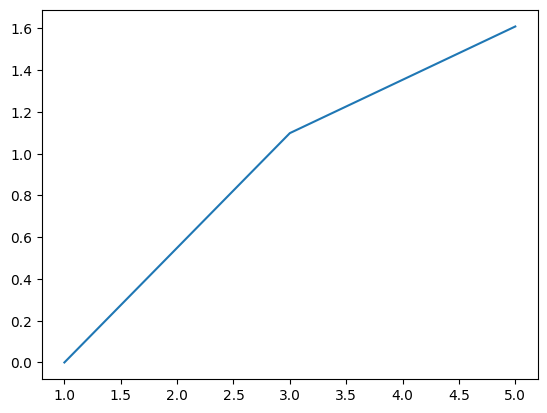

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,3,5])
y = np.log(x)

plt.plot(x,y)
plt.show()

In [24]:
import pandas as pd
df = pd.read_csv('data/airbnb_NYC.csv',encoding='latin1')

df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


<Axes: >

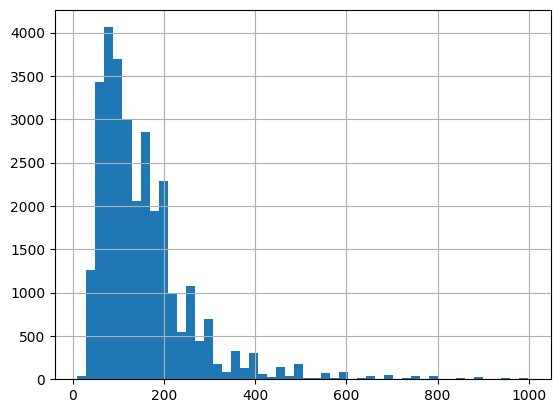

In [30]:
x= df['Price'].str.replace(',',' ')
pd.to_numeric(x,errors='coerce').hist(bins=50)

In [40]:
import pandas as pd
df1 = pd.read_csv('data/craigslist_cville_cars.csv',encoding='latin1')
df1.head()

,Unnamed: 0,title,price,year,link,brand,age
0,0,a sweet sedan avalon xle plus,24000,NaN,https://charlottesville.craigslist.org/cto/d/c...,missing,NaN
1,1,"1998 gmc sierra 1500 sl truck auto rwd <103,00...",6950,1998.0,https://charlottesville.craigslist.org/cto/d/l...,gmc,27.0
2,2,gmc sierra 3500hd 6.6 duramax diesel dually,26000,NaN,https://charlottesville.craigslist.org/cto/d/c...,gmc,NaN
3,3,2007 chrysler sebring,2900,2007.0,https://charlottesville.craigslist.org/cto/d/c...,missing,18.0
4,4,2012 nissan versa sl,3500,2012.0,https://charlottesville.craigslist.org/cto/d/c...,missing,13.0


<Axes: >

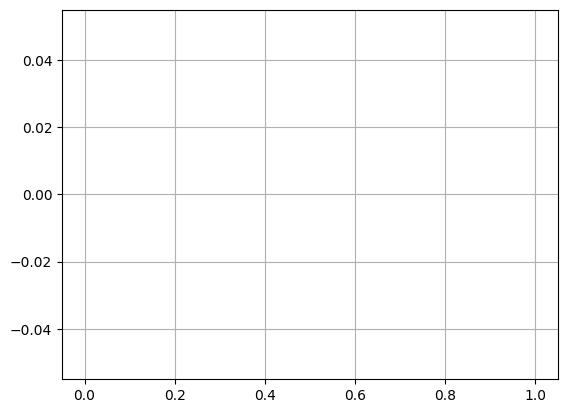

In [39]:
x= df1['brand']
pd.to_numeric(x,errors='coerce').hist(bins=50)

In [ ]:
# Filter out missing brands
df_clean = df1[(df1['brand'] != 'missing') & (df1['brand'].notna())].copy()

# Group by brand and get statistics
brand_stats = df_clean.groupby('brand')['price'].agg(['mean', 'median', 'min', 'max', 'count'])
print(brand_stats)

# Plot mean price by brand
brand_stats['mean'].sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.xlabel('Brand')
plt.ylabel('Mean Price ($)')
plt.title('Average Car Price by Brand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()